### Mean-Median-Imputation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to split the dataset
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv",usecols=["age", "fare", "survived"])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [10]:
data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [11]:
# imputation values should be calculated using training set,and same value should be used to impute test set
# to avoid overfitting
X_train,X_test,y_train,y_test = train_test_split(
data[['age','fare']],
data['survived'],test_size=0.5,random_state=0)

X_train.shape,X_test.shape

((654, 2), (655, 2))

In [12]:
X_train.isnull().mean()

age     0.191131
fare    0.000000
dtype: float64

In [22]:
# calculate the median age
median = X_train.age.median()
median = np.round(median,1)
median

28.0

In [19]:
# calculate mean of age
mean = X_train.age.mean()
mean = np.round(mean,1)
mean

30.0

In [23]:
# New variable with missing values replaced
X_train['Age_median'] = X_train['age'].fillna(median)

# now replace with mean
X_train['Age_mean'] = X_train['age'].fillna(mean)
X_train.head(5)

,age,fare,Age_median,Age_mean
293,NaN,52.0000,28.0,30.0
76,39.0,83.1583,39.0,39.0
48,53.0,27.4458,53.0,53.0
689,22.0,7.2500,22.0,22.0
1195,NaN,7.7500,28.0,30.0


In [27]:
# Check the variance after imputation
print("Original Variable variance",X_train['age'].var())
print("Variance after mean Imputation",X_train['Age_mean'].var())
print("Variance after median Imputation",X_train['Age_median'].var())

Original Variable variance 194.29926044010145
Variance after mean Imputation 157.10590761240317
Variance after median Imputation 157.7015471214206


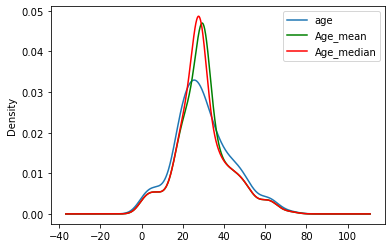

In [29]:
# Distribution has changed
#more values toward median
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde',ax=ax)

#variable imputation with mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='green')
# variable imputed with the median
X_train["Age_median"].plot(kind="kde", ax=ax, color="red")

# add lagend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


In [30]:
# imputed variable might negatively affect 
X_train[['fare','age','Age_median','Age_mean']].cov()

,fare,age,Age_median,Age_mean
fare,2199.947144,111.318279,93.569378,89.939797
age,111.318279,194.299260,194.299260,194.299260
Age_median,93.569378,194.299260,157.701547,157.094053
Age_mean,89.939797,194.299260,157.094053,157.105908


<AxesSubplot:>

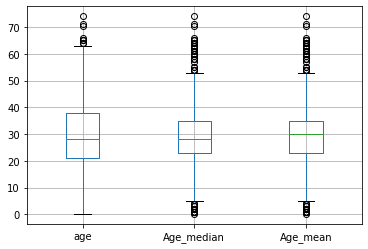

In [34]:
# In other words, mean / median imputation may lead to an increase
# in the number of detected outliers.

# Let's find out using a boxplot.
X_train[["age", "Age_median", "Age_mean"]].boxplot()